In [1]:
import pandas as pd
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/csv/DataFrame_pour_modeles_Lou.csv')

In [3]:
df.head()

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098


In [4]:
df['D28'] = df['J28'] -  df['J0']
df['D21'] = df['J21'] -  df['J0']
df['D14'] =  df['J14'] -  df['J0']
df['D-14'] = df['J0'] -  df['J-14']
df['D-21'] = df['J0'] -  df['J-21']
df['D-28'] = df['J0'] -  df['J-28']

# Let's start with dataviz

In [5]:
df1 = df.copy()

In [6]:
df1.columns


Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'value', 'Cases',
       'Cases_New', 'Type', 'Source', 'J-56', 'J-42', 'J-35', 'J-28', 'J-21',
       'J-14', 'J-7', 'J0', 'J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49',
       'J56', 'd_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff', 'D28', 'D21', 'D14', 'D-14', 'D-21', 'D-28'],
      dtype='object')

In [7]:
df1.columns

Index(['ID', 'Date', 'PolicyFamily', 'PolicyType', 'value', 'Cases',
       'Cases_New', 'Type', 'Source', 'J-56', 'J-42', 'J-35', 'J-28', 'J-21',
       'J-14', 'J-7', 'J0', 'J7', 'J14', 'J21', 'J28', 'J35', 'J42', 'J49',
       'J56', 'd_j-7', 'i_J-7', 'i_J-14', 'i_J-21', 'i_J-28', 'i_J-35',
       'i_J-42', 'i_J-56', 'i_J7', 'i_J14', 'i_J21', 'i_J28', 'i_J35', 'i_J42',
       'i_J49', 'i_J56', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff', 'D28', 'D21', 'D14', 'D-14', 'D-21', 'D-28'],
      dtype='object')

In [24]:
def handle_policy(x):
    if x == 'E3_diff':
        return 'Fiscal measures'
    if x == 'H2_diff':
        return 'Testing policy'
    if x == 'C3_diff':
        return 'Cancel public events'
    if x == 'H6_diff':
        return 'Facial Coverings'
    if x == 'C6_diff':
        return 'Stay at home'
    if x == 'E1_diff':
        return 'Income support'
    if x == 'C2_diff':
        return 'Workplace closing'
    if x == 'C1_diff':
        return 'School closing'
    if x == 'C5_diff':
        return 'Close public transport'
    if x == 'H1_diff':
        return 'Public information campaigns'
    if x == 'H3_diff':
        return 'Contact tracing'
    if x ==  'H4_diff':
        return 'Emergency investment in healthcare'
    if x == 'C8_diff':
        return 'International travel controls'
    if x == 'E2_diff':
        return 'Debt/contract relief'
    if x == 'C4_diff':
        return 'Restrictions on gatherings'
    if x == 'E4_diff':
        return 'International support'
    if x == 'C7_diff':
        return 'Restrictions on internal movement'
    if x == 'H5_diff':
        return 'Investment in vaccines'

In [25]:

df1['Policy'] = df1['PolicyType'].apply(handle_policy)

In [26]:
df1.head()

,ID,Date,PolicyFamily,PolicyType,value,Cases,Cases_New,Type,Source,J-56,...,E4_diff,C7_diff,H5_diff,D28,D21,D14,D-14,D-21,D-28,Policy
0,AD,2020-02-27,E,E3_diff,141399008,0.0,0.0,Deaths,JHU,NaN,...,0.514924,0.5,0.524098,3.0,0.0,0.0,0.0,0.0,0.0,Fiscal measures
1,AD,2020-02-28,E,E3_diff,-141399008,0.0,0.0,Deaths,JHU,NaN,...,0.514924,0.5,0.524098,3.0,0.0,0.0,0.0,0.0,0.0,Fiscal measures
2,AD,2020-03-02,H,H2_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.514924,0.5,0.524098,8.0,1.0,0.0,0.0,0.0,0.0,Testing policy
3,AD,2020-03-11,H,H6_diff,2,0.0,0.0,Deaths,JHU,NaN,...,0.514924,0.5,0.524098,23.0,14.0,1.0,0.0,0.0,0.0,Facial Coverings
4,AD,2020-03-13,C,C3_diff,1,0.0,0.0,Deaths,JHU,NaN,...,0.514924,0.5,0.524098,26.0,16.0,3.0,0.0,0.0,0.0,Cancel public events


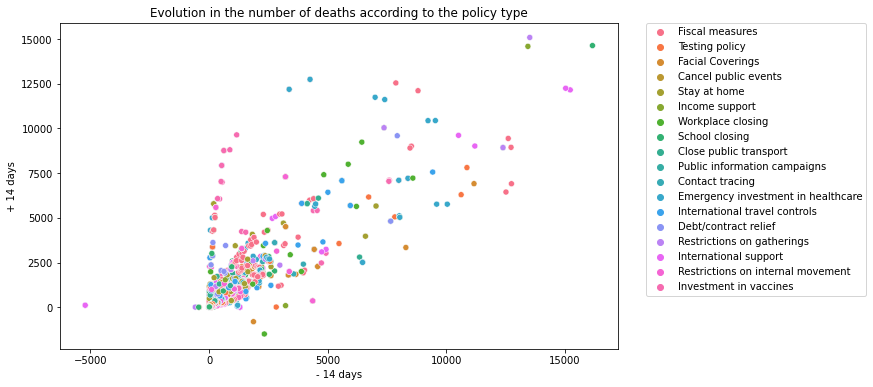

In [29]:
plt.figure(figsize=(10,6))
sns_plot = sns.scatterplot(x=df1['D-14'],y=df1['D14'],hue=df1['Policy'])
plt.title("Evolution in the number of deaths according to the policy type")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig('Evolution in the number of deaths according to the policy type', dpi=300)
plt.xlabel("- 14 days")
plt.ylabel("+ 14 days")
fig = sns_plot.get_figure()
fig.savefig("Evolution in the number of deaths according to the policy type2.png", dpi=300)

# XGboost

In [12]:
df1 = df.copy() 

In [13]:
df_xgb = df1[['D-14', 'D14', 'E3_diff', 'H2_diff', 'H6_diff', 'C3_diff', 'C6_diff',
       'E1_diff', 'C2_diff', 'C1_diff', 'C5_diff', 'H1_diff', 'H3_diff',
       'H4_diff', 'C8_diff', 'E2_diff', 'C4_diff', 'E4_diff', 'C7_diff',
       'H5_diff']]

In [14]:
df_xgb.replace([np.inf, -np.inf], np.nan, inplace=True)
df_xgb.dropna(inplace = True)

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
scaler = MinMaxScaler()
df_xgb['D-14'] = scaler.fit_transform(df_xgb[['D-14']])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
X = df_xgb.drop(columns='D14')
y = df_xgb['D14']

In [17]:
des = X.describe()

In [23]:
des

,D-14,E3_diff,H2_diff,H6_diff,C3_diff,C6_diff,E1_diff,C2_diff,C1_diff,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
count,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000
mean,0.254954,0.488052,0.407979,0.438823,0.507383,0.503670,0.504793,0.504642,0.505030,0.502073,0.506509,0.507578,0.527048,0.503141,0.505732,0.507416,0.514272,0.504501,0.523826
std,0.045032,0.101108,0.052983,0.063273,0.083119,0.068088,0.052712,0.073152,0.081239,0.076112,0.052605,0.062918,0.042224,0.065185,0.061092,0.072697,0.020757,0.097269,0.016420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244259,0.505590,0.400000,0.428571,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.529656,0.500000,0.500000,0.500000,0.514924,0.500000,0.524098
50%,0.244447,0.505590,0.400000,0.428571,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.529656,0.500000,0.500000,0.500000,0.514924,0.500000,0.524098
75%,0.247159,0.505590,0.400000,0.428571,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.529656,0.500000,0.500000,0.500000,0.514924,0.500000,0.524098
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850617,1.000000,0.934042


In [18]:
mean_features = pd.DataFrame(des.iloc[1,:]).T

In [19]:
mean_features

,D-14,E3_diff,H2_diff,H6_diff,C3_diff,C6_diff,E1_diff,C2_diff,C1_diff,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
mean,0.254954,0.488052,0.407979,0.438823,0.507383,0.50367,0.504793,0.504642,0.50503,0.502073,0.506509,0.507578,0.527048,0.503141,0.505732,0.507416,0.514272,0.504501,0.523826


In [20]:
mean_features.to_csv(r'mean_features.csv', index = False)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [22]:
best_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.045, max_delta_step=0, max_depth=5,
             min_child_weight=4,  monotone_constraints='()',
             n_estimators=650, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

best_xgb.fit(X_train,y_train)

[18:11:49] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:11:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:11:51] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.045, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=650, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.6, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
new_x = X.iloc[1,:,].predict

D-14       0.244259
E3_diff    0.472300
H2_diff    0.400000
H6_diff    0.428571
C3_diff    0.500000
C6_diff    0.500000
E1_diff    0.500000
C2_diff    0.500000
C1_diff    0.500000
C5_diff    0.500000
H1_diff    0.500000
H3_diff    0.500000
H4_diff    0.529656
C8_diff    0.500000
E2_diff    0.500000
C4_diff    0.500000
E4_diff    0.514924
C7_diff    0.500000
H5_diff    0.524098
Name: 1, dtype: float64

In [13]:
import joblib
joblib.dump(best_xgb,'XGboost_CORONANET.joblib')

['XGboost_CORONANET.joblib']

In [14]:
best_xgb.score(X_test, y_test)

0.7489218848583479

In [138]:
X_ = pd.DataFrame(X_test.iloc[0:2,:])

In [139]:
X_

,D-14,E3_diff,H2_diff,H6_diff,C3_diff,C6_diff,E1_diff,C2_diff,C1_diff,C5_diff,H1_diff,H3_diff,H4_diff,C8_diff,E2_diff,C4_diff,E4_diff,C7_diff,H5_diff
3549,0.258850,0.50559,0.4,0.428571,0.5,0.500000,0.5,0.5,0.5,0.5,0.5,0.5,0.534758,0.5,0.5,0.5,0.514924,0.5,0.524098
5619,0.246972,0.50559,0.4,0.428571,0.5,0.333333,0.5,0.5,0.5,0.5,0.5,0.5,0.529656,0.5,0.5,0.5,0.514924,0.5,0.524098


In [140]:
from sklearn.metrics import r2_score

y_pred = best_xgb.predict(X_)


In [141]:
y_pred

array([364.66968,  72.77628], dtype=float32)

In [123]:
print(y_test.shape)
print(y_pred.shape)

(2316,)
(2316,)


In [16]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 505.390625


In [17]:
coeff_df_best_xgboost_2 = pd.DataFrame(best_xgb.feature_importances_, X.columns, columns=['Coefficient']).reset_index().rename(columns={'index':'Features', 'Coefficient': 'Importancies'}).sort_values(by=['Importancies'], ascending=False)
coeff_df_best_xgboost_2 

,Features,Importancies
0,D-14,0.270528
3,H6_diff,0.105168
12,H4_diff,0.070047
2,H2_diff,0.062036
1,E3_diff,0.059818
7,C2_diff,0.051875
10,H1_diff,0.049420
18,H5_diff,0.044412
4,C3_diff,0.039967
6,E1_diff,0.039785


In [18]:
importante_features = pd.DataFrame(coeff_df_best_xgboost_2)

In [20]:
importante_features.to_csv(r'features_importance', index = False)

In [80]:
coeff_df_best_xgboost_2.reset_index(inplace=True)

In [81]:
coeff_df_best_xgboost_2['Measures'] = pd.Series(['D14', 'Facial Coverings', 'Emergency investment in healthcare', 
                                                'Testing policy', 'Fiscal measures', 'Workplace closing', 
                                                'Public information campaigns', 'Investment in vaccines',
                                                'Cancel public events', 'Income support', 'Stay at home',
                                                'Debt/contract relief', 'International travel controls',
                                                'International support', 'School closing', 'Restrictions on internal movement',
                                                'Close public transport', 'Restrictions on gatherings', 
                                                'Contact tracing'])

In [82]:
coeff_df_best_xgboost_2


,index,Features,Importancies,Type,Measures
0,0,D-14,0.270528,None,D14
1,3,H6_diff,0.105168,H,Facial Coverings
2,12,H4_diff,0.070047,H,Emergency investment in healthcare
3,2,H2_diff,0.062036,H,Testing policy
4,1,E3_diff,0.059818,E,Fiscal measures
5,7,C2_diff,0.051875,C,Workplace closing
6,10,H1_diff,0.049420,H,Public information campaigns
7,18,H5_diff,0.044412,H,Investment in vaccines
8,4,C3_diff,0.039967,C,Cancel public events
9,6,E1_diff,0.039785,E,Income support


In [83]:
def handle_policy_type(x):
    if 'H' in x:
        return 'H'
    if 'C' in x:
        return 'C'
    if 'E' in x:
        return 'E'

In [84]:
coeff_df_best_xgboost_2['Type'] = coeff_df_best_xgboost_2['Features'].apply(handle_policy_type)


In [149]:
import matplotlib.style as style style.available
style.available

NameError: name 'style' is not defined

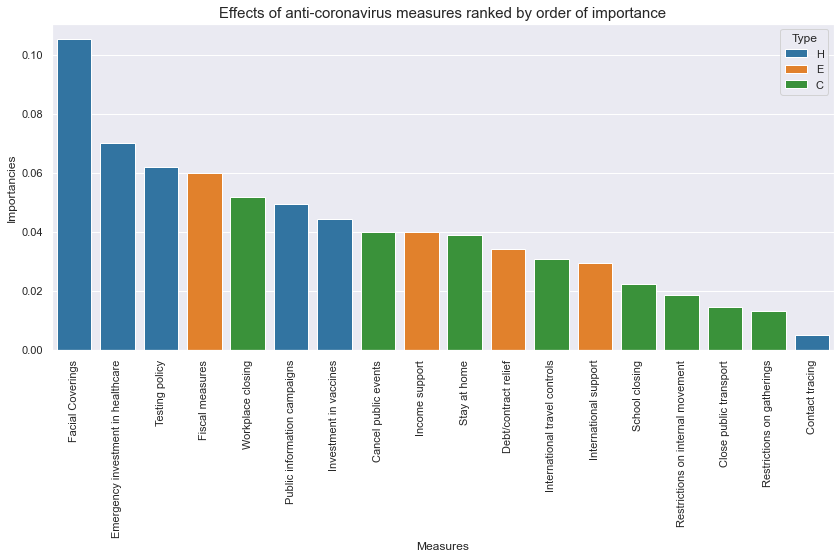

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

x_vals = coeff_df_best_xgboost_2['Measures'][1:]
y_vals = coeff_df_best_xgboost_2['Importancies'][1:]
hue = coeff_df_best_xgboost_2['Type'][1:]

sns.set()
plt.figure(figsize=(14,6))
sns.barplot(x=x_vals,y=y_vals, palette="tab10", hue=hue, dodge=False)
plt.xticks(rotation=90)

plt.title('Effects of anti-coronavirus measures ranked by order of importance',size=15)
plt.savefig('Effects of anti-coronavirus measures ranked by order of importance', dpi=300)